# MC Simulation example
A notebook with some example usage for running an `MC` simulation.

## Imports

In [1]:
import mm_2019_sss_1 as mm
import matplotlib.pyplot as plt

## Initalize the simulation

By selecting `method="random"` we ask to create `num_particles` randomly placed in a simulation box. The simulation box size is derived from the reduced density `reduced_den` and the `num_particles`. `max_displacement` is the initial maximum displacement for a trial MC move and `cutoff` is the `cutoff` used in computing the particle pair potentials.

In [2]:
sim = mm.MC(method='random', num_particles=500, reduced_den=0.9, reduced_temp=0.9, max_displacement=0.1, cutoff=3.0)

The `sim` object contains some useful methods.

In [3]:
help(sim)

Help on MC in module mm_2019_sss_1.mc object:

class MC(builtins.object)
 |  MC(method, reduced_temp, max_displacement, cutoff, num_particles=None, file_name=None, tune_displacement=True, reduced_den=None)
 |  
 |  This is a class for the operations of a Monte Carlo simulation.
 |  
 |  Attributes
 |  ----------
 |      method : string
 |          Name of the coordinate file or "random" to generate random starting coordinates.
 |      reduced_temp : float
 |          Reduced temperature given the temperature of the system and its critical temperature. 
 |      max_displacement : float
 |          Magnitude of particle displacement for Monte Carlo steps.
 |      cutoff : float
 |          Distance limit for computation of LJ potential.
 |      num_particles : int
 |          Number of particles in the system.  
 |      file_name : string
 |          Name of the xyz coordinates file. File extension has to be included.
 |      tune_displacement : Boolean
 |          If True the magnitude 

We can use `sim.get_snapshot()` to extract a `Geom` object which contains information regarding the geometry of our system. For instance, `Geom.coordinates` will extract the x y z coordinates of each particle.

In [4]:
Geom = sim.get_snapshot()
coords = Geom.coordinates
print(coords.shape)
coords

(500, 3)


array([[-2.5026429 ,  3.64779533, -1.42338767],
       [ 1.5619356 , -1.41388166,  1.40654893],
       [-3.6240787 , -3.38900911,  2.53674791],
       ...,
       [ 3.73067758,  0.87468888, -0.87189748],
       [ 0.38216296, -0.44950628, -2.71974417],
       [ 3.04776566, -0.6742255 , -1.41570996]])

Looking at the cooridnates we see that particles have some overlaps. By running MC we can correct these overlaps by iteratively adjusting the particle coordinates.

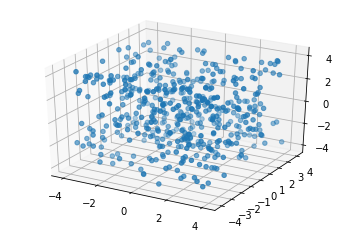

In [5]:
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(coords[:,0], coords[:,1], coords[:,2])

## Run the simulation

We run a simulation with the `run()` method, setting the `n_steps` paramter. The `freq` parameter will set how frequently stats will be print. Here we run for `n_steps=50000` steps, printing stats every `freq=1,000` steps. A `results` directory will by default be created where a `results.log` file will store the output. We also set `save_snaps=True` to not save a .xyz file of the box configuration every `freq=1000` steps. By default the `run()` method will throw an error if a `results` directory already exists, so we remove the existing one if need be.

In [6]:
!rm -r results/

In [7]:
sim.run(n_steps=50000, freq=1000, save_snaps=True)

Step: 1000 | Energy: 29740330.01992
Step: 2000 | Energy: 92782.78355
Step: 3000 | Energy: 4274.2889
Step: 4000 | Energy: 2496.3694
Step: 5000 | Energy: 681.41281
Step: 6000 | Energy: 199.75287
Step: 7000 | Energy: 51.96136
Step: 8000 | Energy: 32.02649
Step: 9000 | Energy: 18.67041
Step: 10000 | Energy: 12.99271
Step: 11000 | Energy: 8.5212
Step: 12000 | Energy: 4.73742
Step: 13000 | Energy: 2.4342
Step: 14000 | Energy: 0.72247
Step: 15000 | Energy: -0.20762
Step: 16000 | Energy: -1.07903
Step: 17000 | Energy: -1.81619
Step: 18000 | Energy: -2.37114
Step: 19000 | Energy: -2.94245
Step: 20000 | Energy: -3.24158
Step: 21000 | Energy: -3.50969
Step: 22000 | Energy: -3.8039
Step: 23000 | Energy: -4.12045
Step: 24000 | Energy: -4.26938
Step: 25000 | Energy: -4.44344
Step: 26000 | Energy: -4.51361
Step: 27000 | Energy: -4.66038
Step: 28000 | Energy: -4.77632
Step: 29000 | Energy: -4.85713
Step: 30000 | Energy: -4.95399
Step: 31000 | Energy: -4.9855
Step: 32000 | Energy: -5.0674
Step: 33000 |

We see a `results` folder was created and can take a quick look at the `results.log` file.

In [8]:
!ls

random_init.ipynb  results            scaling_test.ipynb


In [9]:
!head results/results.log

Starting MC!
Step    |    Energy
-------------------
1000    |    29740330.019916758
2000    |    92782.78355418662
3000    |    4274.288904899699
4000    |    2496.3693963002684
5000    |    681.4128121317967
6000    |    199.75286945745432
7000    |    51.96135788629019


We can now plot the resultant energy by running `sim.plot()`.

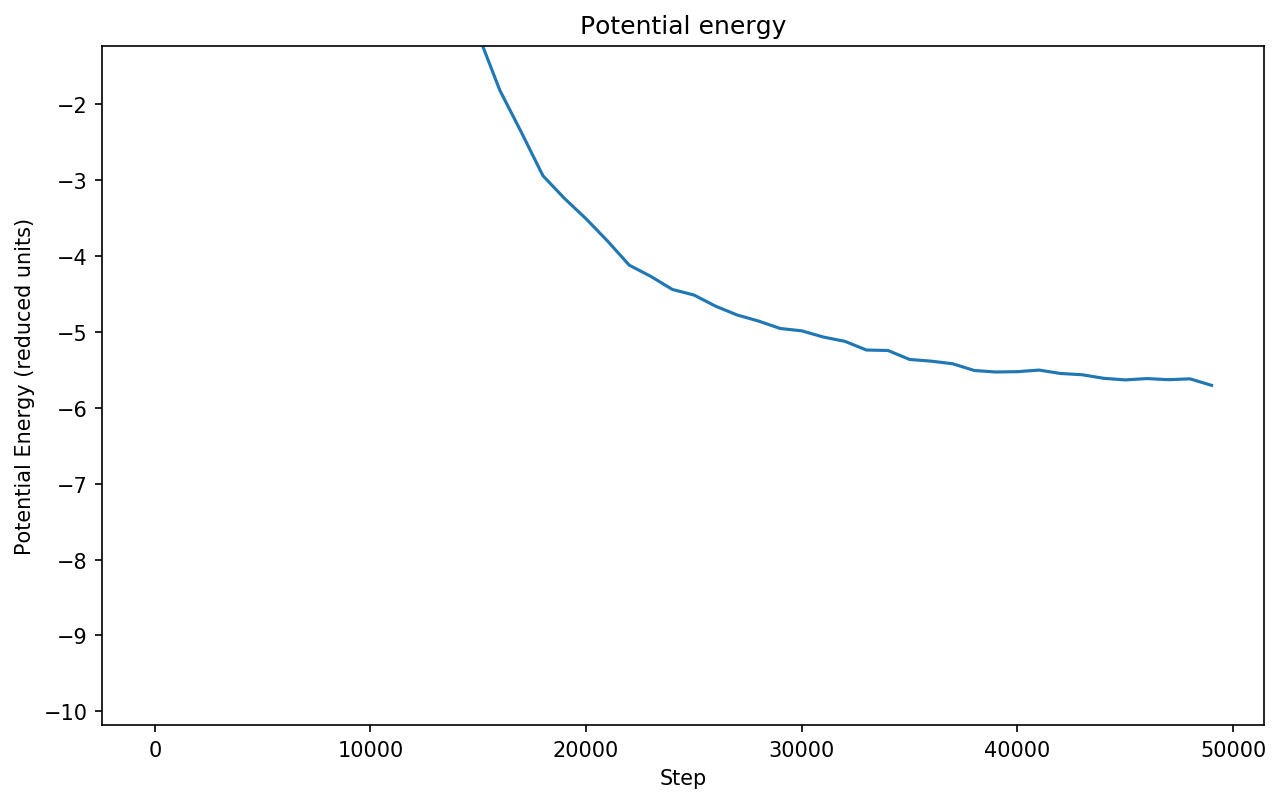

In [10]:
sim.plot()

## Verify convergence

We notice that the energy has not quite converged after 50,000 steps. We can simply continue the simulation by running another instance of the `run()` function. This will resume the simulation from the previous time step. We run this with the `save_snaps=False` option this time, which will not save future snapshots (to avoid clutter). The `results.log` file will still be updated.

In [11]:
sim.run(n_steps=50000, freq=1000, save_snaps=False)

Step: 51000 | Energy: -5.7386
Step: 52000 | Energy: -5.68399
Step: 53000 | Energy: -5.71314
Step: 54000 | Energy: -5.69804
Step: 55000 | Energy: -5.72191
Step: 56000 | Energy: -5.73482
Step: 57000 | Energy: -5.73488
Step: 58000 | Energy: -5.77199
Step: 59000 | Energy: -5.78853
Step: 60000 | Energy: -5.80691
Step: 61000 | Energy: -5.8354
Step: 62000 | Energy: -5.81358
Step: 63000 | Energy: -5.8032
Step: 64000 | Energy: -5.80788
Step: 65000 | Energy: -5.79246
Step: 66000 | Energy: -5.82897
Step: 67000 | Energy: -5.80361
Step: 68000 | Energy: -5.81029
Step: 69000 | Energy: -5.86
Step: 70000 | Energy: -5.83059
Step: 71000 | Energy: -5.92049
Step: 72000 | Energy: -5.88227
Step: 73000 | Energy: -5.87244
Step: 74000 | Energy: -5.83182
Step: 75000 | Energy: -5.89709
Step: 76000 | Energy: -5.90386
Step: 77000 | Energy: -5.93035
Step: 78000 | Energy: -5.90931
Step: 79000 | Energy: -5.95989
Step: 80000 | Energy: -5.91167
Step: 81000 | Energy: -5.91959
Step: 82000 | Energy: -5.93624
Step: 83000 | 

Here we set `save_plot=True` to indicate that we want to save the output graph to a file. By default, it will be saved to `./results/energy.png`.

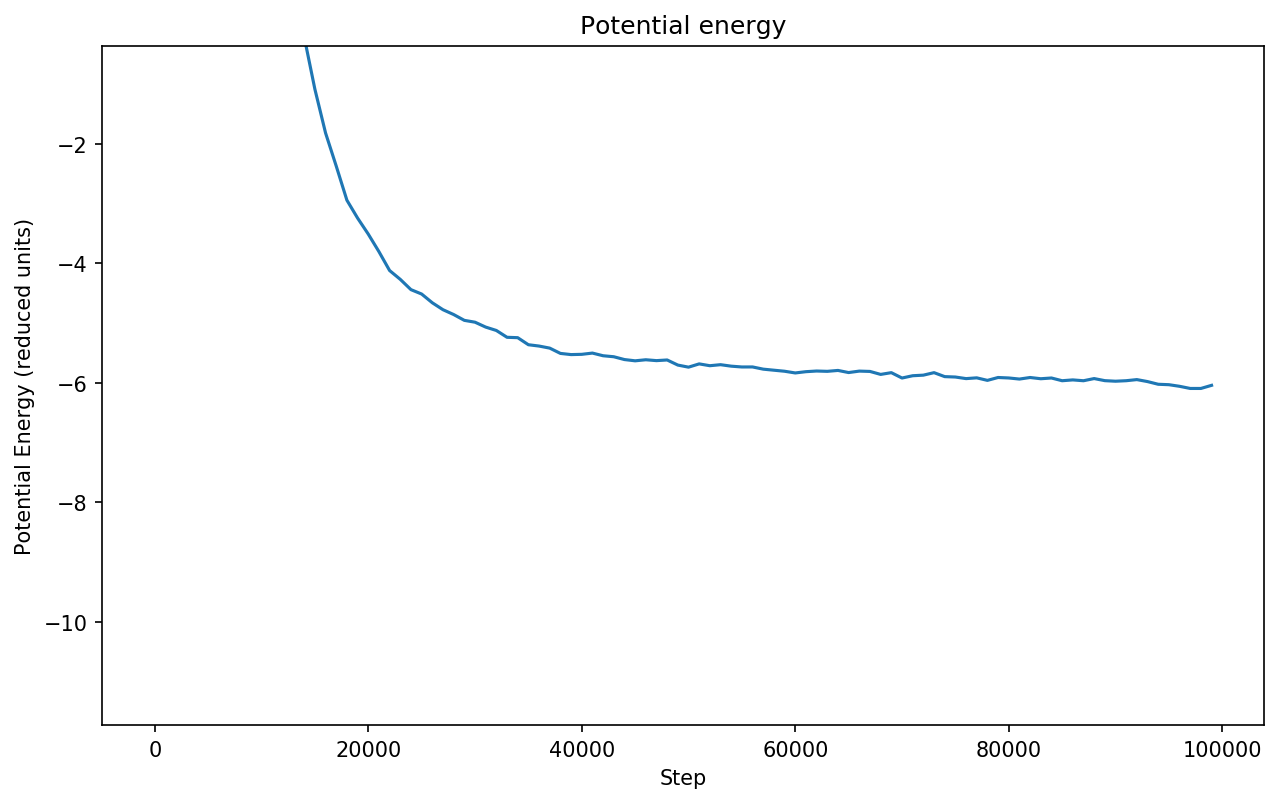

In [12]:
sim.plot(save_plot=True)

Now we see the energy has effectively plateaued. We can extract the energy throughout the simulation using `sim.get_energy()`.

In [13]:
energy = sim.get_energy()
print(energy.shape)
print(f"Average energy over final 10,000 steps: {energy[-10000].mean().round(5)}")

(100001,)
Average energy over final 10,000 steps: -5.96638


Lastly, we can visualize the final frame using the same `sim.get_snapshot()` method as before. Notice there are markedly fewer particle overlaps compared to the initial configuration.

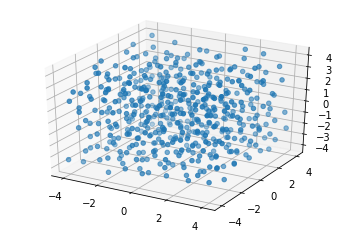

In [14]:
Geom = sim.get_snapshot()
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(coords[:,0], coords[:,1], coords[:,2])